## **[기술 통계 분석 + 그래프]**

**와인 품질 등급 예측하기**

### **분석 미리보기**

* 목표: 와인 속성을 분석하여 품질 등급을 예측한다.
* 핵심 개념: 기술 통계/ 회귀 분석/ t-검정/ 히스토그램
* 데이터 수집: 레드 와인/ 화이트 와인 데이터셋: 캘리포니아 어바인 대학의 머신러닝 저장소에서 다운로드
* 데이터 준비: 수집한 데이터 파일 병합
* 데이터 탐색: 정보 확인(info()), 기술 통계 확인(describe(), unique(), value_counts())
* 데이터 모델링:
    * 데이터를 두 그룹으로 비교 분석
        * 그룹별 기술 통계 분석: describe()
        * t-검정: scipy 패키지의 ttest_ind()
        * 회귀 분석: statsmodels.formula.api 패키지의 ols()
    * 품질 등급 예측
        * 샘플을 독립 변수(x)로 지정-> 회귀 분석 모델 적용-> 종족 변수(y)인 품질(quality) 예측

### **핵심 개념 이해**

* 기술 통계:
    기술 통계(description statistics)는 데이터의 특성을 나타내는 수치를 이용해 분석하는 기본적 통계 방법으로 요약 통계(summary statics)라고도 한다.
    기술 통계로 구할 수 있는 통계값에는 평균(mean), 중앙값(median), 최빈값(mode) 등이 있다. 이를 통해 데이터를 대표하는 값을 찾을 수 있고 표준 편차(standard deviation)와 사분위(quartile)로 데이터가 어떻게 분포되는지 알 수 있다.

* 회귀 분석:
    회귀 분석(regression analysis)은 독립 변수(independent vairable), x와 종속 변수(dependent variable), y간의 상호 연관성 정도를 파악하기 위한 분석 기법이다. 하나의 변수가 변함에 따라 대응되는 변수가 어떻게 변하는지를 측정하는 것으로, 변수 간의 인관관계(casual relation)를 분석할 때 많이 사용한다. 독립 변수가 한 개이면 단순 회귀 분석, 두 개 이상이면 다중 회귀 분석이라고 하며 독립 변수와 종속 변수의 관계에 따라 선형 회귀 분석과 비선형 회귀 분석으로 나누기도 한다.

* t-검정:
    데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인하는 방법이다. 예컨대, A와인의 품질이 1등급인지 2등급인지에 따라 가격에 차이가 있는지를 확인할 때 사용한다.

* 히스토그램:
    히스토그램(histogram)은 데이터 값의 범위를 몇 개 구간으로 나누고 각 구간에 해당하는 값의 숫자나 상대적 빈도 크기를 차트로 나타낸 것이다. 파이썬 프로그래밍을 그리려면 matplotlib 라이브러리 패키지의 hist() 함수나 seaborn 라이브러리 패키지의 distplot() 함수를 사용한다.

### **다운로드한 CSV 파일 정리하기**

CSV 파일의 내용은 쉼표, 띄어쓰기, 세미콜론(;) 등을 열 구분자로 사용하는데 우리가 다운로드한 파일은 세미콜론을 열 구분자로 사용한다.
그런데 엑셀은 CSV 파일을 열 때 쉼표를 열 구분자로 사용하므로 열이 깨진 것처럼 보인다.
하지만 실제 내용은 세미콜론을 열 구분자로 하여 제대로 구성되어 있으므로 데이터 파일을 이대로 사용해도 문제는 없다.
하지만 데이터셋의 구성이 어려우므로 엑셀에서 세미콜론을 열 구분자로 인식하도록 다시 저장해본다.

In [13]:
import pandas as pd

red_df = pd.read_csv(
    './winequality-red.csv',
    sep=';',
    header=0,
    engine='python',
)
white_df = pd.read_csv(
    './winequality-white.csv',
    sep=';',
    header=0,
    engine='python',
)

red_df.to_csv(
    './winequality-red2.csv',
    index=False,
)

white_df.to_csv(
    './winequality-white2.csv',
    index=False,
)

이 파일은 머신러닝용 입력 데이터셋으로 작성한 것이므로 데이터 정제 등의 전처리 작업은 이미 되어 있다.
각 파일을 좀더 살펴보자.

winequality-red2.csv 파일은 레드 와인에 대한 데이터셋이다.
행이 1,599개이므로 샘플이 1,599개이고 열은 12개이다.
머신러닝용 데이터셋은 n개 속성 중에서 마지막이 출력 변수(y)이고 앞에서부터 n-1개 속성은 입력 변수(y)로 구성한다.
입력 변수는 fixed acridity(고정산), volatile acidity(휘발산), critic acid(구연산), residual sugar(잔당), chlorides(염화물), free sulfur dioxide(유리 이산화황), total sulfur dioxide(총 이산화황), density(밀도), PH sulphates(황산염), alcohol(알코올) 등의 11개 속성이고 출력 변수는 와인의 품질 등급을 나타내는 quality이다.

winequality-white2.csv 파일은 화이트 와인에 대한 데이터셋이다.
샘플이 4,898개이고 열은 11개의 입력 변수와 1개의 출력 변수quality로 구성되어 있다.

#### **데이터 병합하기**

1. 레드 와인과 화이트 와인 파일 합치기

레드 와인과 화이트 와인을 비교해서 분석할 것이므로 두 파일을 하나로 합쳐야 한다.
이때 type 열을 추가하여 레드 와인과 화이트 와인을 구분한다.

In [14]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
red_df.insert(
    0,
    column='type',
    value='red',
)
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
red_df.shape

(1599, 13)

In [17]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
white_df.insert(
    0,
    column='type',
    value='white',
)
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
white_df.shape

(4898, 13)

In [20]:
wine = pd.concat([red_df, white_df])
wine.shape

(6497, 13)

In [21]:
wine.to_csv(
    './wine.csv',
    index=False,
)

### **데이터 탐색**

앞서 준비한 wine.csv 파일의 데이터를 기술 통계 방법으로 탐색해본다.

#### **기본 정보 확인하기**

먼저, info() 함수를 사용해 기본 정보를 확인한다.

In [22]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


전체 샘플은 6,497개이고 속성을 나타내는 열은 13개인 것을 알 수 있다.
각 속성의 이름은 type부터 quality까지이고 속성 중에서 실수 타입(float64)은 11개, 정수 타입(int64)는 1개(quality) 
그리고 객체 타입(object)이 1개(type)이다.
독립 변수(x)는 type부터 alcohol까지 12개이고 종속 변수(y)는 1개(quality)이다.

#### **함수를 사용해 기술 통계 구하기**

Pandas 라이브러리 패키지의 describe(), unique(), values_counts() 함수를 사용해 수치형 변수에 대한 기술 통계를 구한다.

In [23]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
sorted(wine.quality.unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [26]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### **데이터 모델링**

기술 통계를 사용해 데이터에서 탐색한 내용으로 레드 와인 그룹과 화이트 와인 그룹을 비교한 뒤 품질 등급을 예측하기 위한 분석 모델을 만들어본다.

#### **describe() 함수로 그룹 비교하기**

그룹을 비교하는 첫 번째 방법은 type에 따라 그룹을 나눈 뒤, 종속 변수인 quality에 describe() 함수를 사용하여 그룹별로 count, mean, std, min, 25%, 50%, 75%, max를 구하여 비교하는 것이다.

In [27]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [28]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [29]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [30]:
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


#### **t-검정과 회귀 분석으로 그룹 비교하기**

그룹을 비교하는 두 번째 방법은 t-검정을 사용해 그룹 간 차이를 확인하는 것이고, 세 번째 방법은 회귀 분석을 수행하는 것이다.
t-검정을 위해서는 scipy 라이브러리 패키지를 사용하고, 회귀 분석을 위해서는 statsmodels 라이브러리 패키지를 사용한다.
pmd 창에서 pip install statsmodels 패키지를 설치한다.

In [31]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [32]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']

In [33]:
white_wine_equality = wine.loc[wine['type'] == 'white', 'quality']

In [34]:
stats.ttest_ind(
    red_wine_quality,
    white_wine_equality,
    equal_var=False,
)

TtestResult(statistic=np.float64(-10.149363059143164), pvalue=np.float64(8.168348870049682e-24), df=np.float64(2950.750452166697))

In [35]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [36]:
regression_result = ols(Rformula, data = wine).fit()

In [37]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:46:30   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기**

회귀 분석 모델을 이용해 새로운 샘플 데이터의 품질 등급을 예측하려면 먼저 독립 변수인 11개의 속성에 대한 샘플 데이터가 필요하다.
예측이 맞는지 확인하기 위해 기존 샘플 샘플 중에서 첫 번째 샘플에 대한 예측을 수행한다.
이를 위해 임의의 샘플 2개를 만들어 예측을 수행해보자.

In [38]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]

In [39]:
sampe1 = sample1[0:5][:]

In [40]:
sample1_predict = regression_result.predict(sample1)

In [41]:
sample1_predict

0       4.997607
1       4.924993
2       5.034663
3       5.680333
4       4.997607
          ...   
4893    6.168984
4894    5.608278
4895    5.419361
4896    6.432656
4897    6.205727
Length: 6497, dtype: float64

In [42]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [43]:
data = {
    "fixed_acidity": [8.5, 8.1],
    "volatile_acidity": [0.8, 0.5],
    "critic_acid": [0.3, 0.4],
    "residual_sugar": [6.1, 5.8],
    "chlorides": [0.055, 0.04],
    "free_sulfur_dioxide": [30.0, 31.0],
    "total_sulfur_dioxide": [98.0, 99],
    "density": [0.996, 0.91],
    "pH": [3.25, 3.01],
    "sulphates": [0.4, 0.35],
    "alcohol": [9.0, 0.88],
}

In [44]:
sample2 = pd.DataFrame(data, columns=sample1.columns)

In [48]:
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,NaN,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,NaN,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [ ]:
sample2_predict = regression_result.predict(sample2)

In [ ]:
sample2_predict

### **결과 시각화**

분석 결과를 시각화하기 위해 와인 유형에 따른 품질 등급을 히스토그램과 부분 회귀 플롯으로 나타낸다.

#### **와인 유형에 따른 품질 등급 히스토그램 그리기**

결과를 시각화하여 나타내기 위해 와인 유형에 따른 품질 등급을 히스토그램으로 먼저 나타내본다.
히스토그램은 matplotlib.pyplot 라이브러리 패키지와 seaborn 라이브러리 패키지를 사용하여 나타낸다.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
sns.set_style('dark')

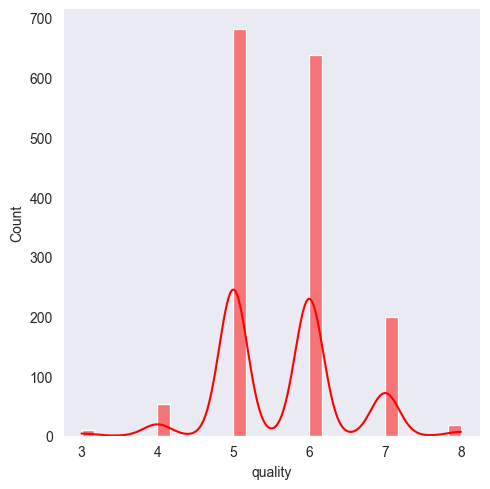

In [56]:
sns.displot(
    red_wine_quality,
    kde=True,
    color="red",
    label='red wine',
)

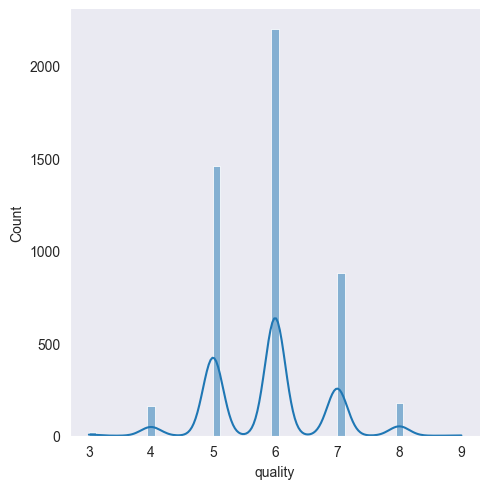

In [57]:
sns.displot(
    white_wine_equality,
    kde=True,
    label='white wine',
)

Text(0.5, 1.0, 'Quality of Wine Type')

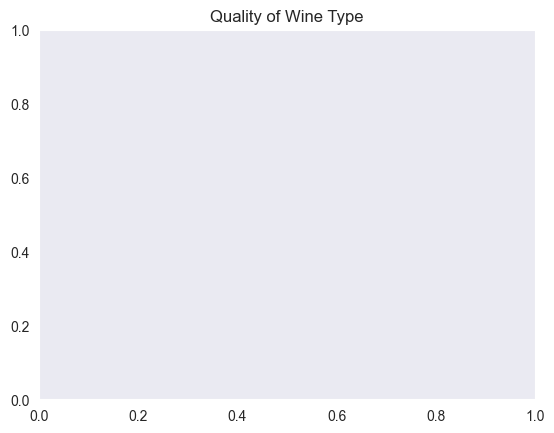

In [58]:
plt.title("Quality of Wine Type")

C:\Users\USER\AppData\Local\Temp\ipykernel_22280\4061938096.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


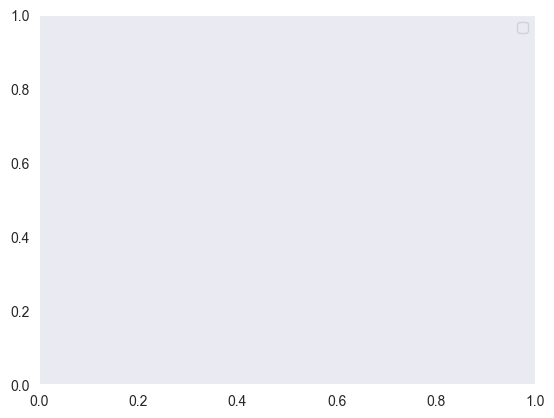

In [59]:
plt.legend()

In [60]:
plt.show()

#### **부분 회귀 플롯으로 시각화하기**

구축한 다중 선형 회귀 분석 모델처럼 독립 변수가 2개 이상인 경우에는 부분 회귀 플롯(partial regression plot)을 사용하여 하나의 독립 변수가 종속 변수에 미치는 영향력을 시각화함으로써 결과를 분석할 수 있다.
fixed_acidity가 종속 변수 quality에 미치는 영향을 분석하기 위해 부분 회귀 결과를 시각화해보고, 각 독립 변수에 대한 부분 회귀 결과도 시각화해본다.

In [61]:
import statsmodels.api as sm

In [62]:
others = list(
    set(wine.columns).difference(set(["quality", "fixed_acidity"]))
)

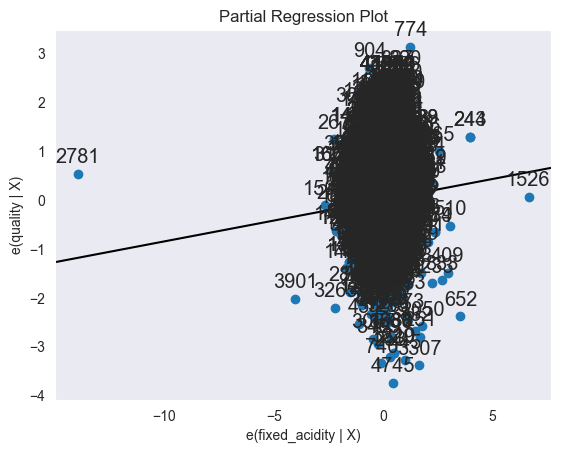

In [64]:
p, redis = sm.graphics.plot_partregress(
    "quality", "fixed_acidity", others, data = wine, ret_coords=True
)

In [65]:
plt.show()

In [66]:
fig = plt.figure(figsize=(8, 13))

<Figure size 800x1300 with 0 Axes>

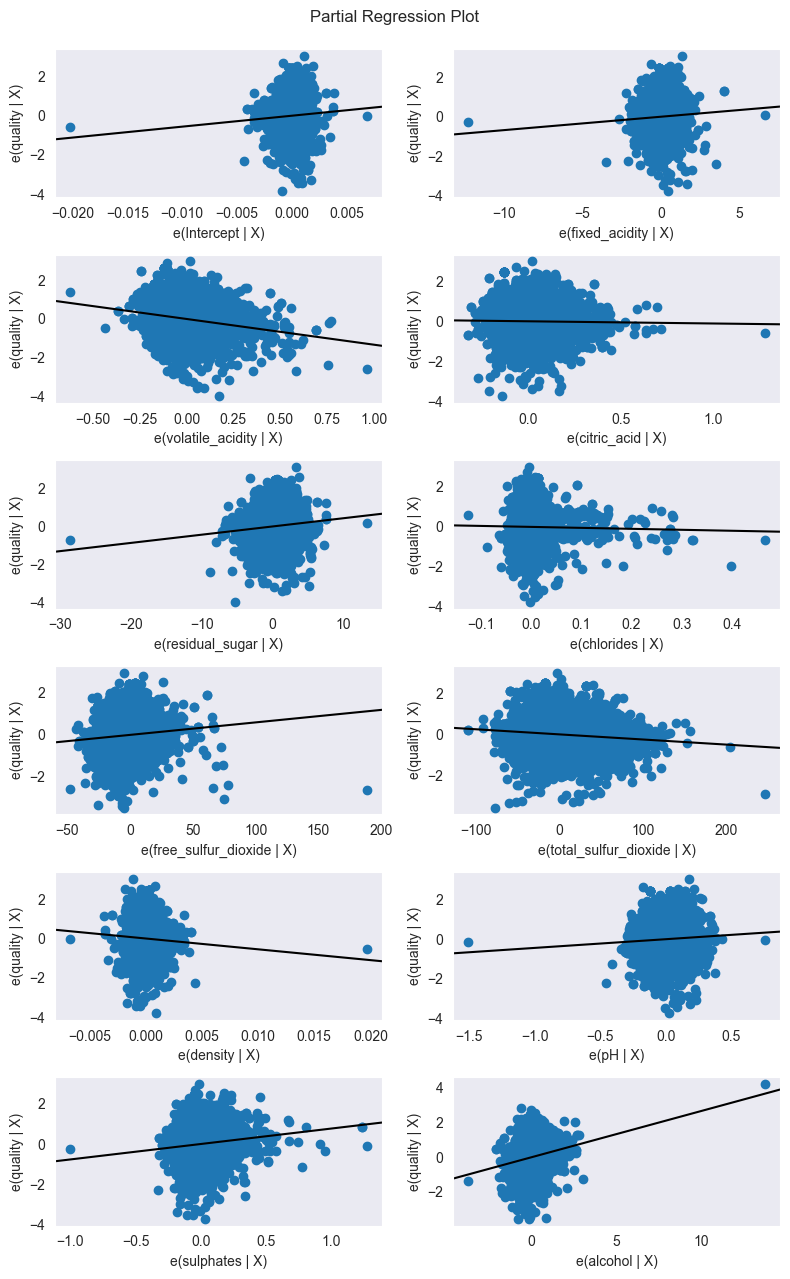

In [67]:
sm.graphics.plot_partregress_grid(
    regression_result, fig=fig
)

In [68]:
plt.show()